## Transfer learning

Transfer learning is a machine learning technique which is reusing a pre-trained model for a different problem. In transfer learning, a machine exploits the knowledge gained from a previous task to enhance its ability to generalize on a new problem.

## TabNet

TabNet is a neural network architecture designed for tabular data that incorporates some principles of transfer learning. It introduces the concept of "attentive transforms" and has been shown to perform well on a variety of tabular datasets.


https://www.kaggle.com/code/enigmak/tabnet-deep-neural-network-for-tabular-data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data_dir = '/content/drive/MyDrive/SHAP/'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Reading the Dataset
import pandas as pd
df_runs_processed = pd.read_csv('all_runs_processed.csv')

In [3]:
df_runs_processed.head(2)

,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,horse_rating,...,all_runs_finished_position,most_frequent_finish,top_3_most_frequent_finish,best_3_values,top_3_prob,average_rank,is_top_3,Top3Finishes,jockey_total_races,jockey_placement_perc
0,0,1,3917,10,0.0,8.00,3,AUS,3,60,...,"[12, 7, 8, 9, 6, 11, 11, 12, 12, 12, 8, 12, 10...",12,"12,8,7","[1, 2, 3]",0.2000,7.566667,0,1811,4719,38.376775
1,0,2,2157,8,0.0,5.75,3,NZ,3,60,...,"[8, 9, 11, 12, 9, 10, 2, 9, 10, 12, 8, 10, 10,...",10,"10,8,9","[1, 2, 3]",0.1875,7.937500,0,509,1893,26.888537


In [4]:
# method one
import pandas as pd
from sklearn.model_selection import train_test_split

# select the features and possible targets for classification modeling

df_selected_modeling = df_runs_processed[['race_id', 'horse_no', 'horse_id','won','is_top_3', 'horse_age',
        'horse_type', 'horse_gear',
       'declared_weight', 'actual_weight', 'draw', 'win_odds',
       'place_odds', 'venue', 'config', 'surface', 'distance', 'going',
       'race_class', 'horse_place_perc', 'jockey_place_perc',
       'trainer_place_perc', 'average_rank','jockey_placement_perc','Top3Finishes']] # Replace with your actual feature columns

#y_1 = df_runs_processed['won']  # Replace with your actual target column
#y_2= df_runs_processed['top_3_prob']
#y_3= df_runs_processed['result']

# split the data into training ,validation ,testing 7:3

# split the data into training ,validation ,testing 7:3
train_set, bigtest_set = train_test_split(df_selected_modeling, test_size = 0.2, random_state=42)
val_set,test_set = train_test_split(bigtest_set, test_size=0.5, random_state=42)

In [5]:
# training
X_train = train_set.drop(['won','is_top_3'],axis=1)
y_train = train_set['is_top_3']

# validation
X_val = val_set.drop(['won','is_top_3'],axis=1)
y_val = val_set['is_top_3']

# test
X_test = test_set.drop(['won','is_top_3'],axis=1)
y_test = test_set['is_top_3']


#Verify the size and label distribution in each dataset.

print("Training dataset size:",y_train.shape[0])
print("Training dataset distribution:\n", y_train.value_counts())

print("Validation dataset size:",y_val.shape[0])
print("Validation dataset distribution:\n", y_val.value_counts())

print("Test dataset size: ",y_test.shape[0])
print("Test dataset distribution:\n ", y_test.value_counts())

Training dataset size: 63557
Training dataset distribution:
 0    48261
1    15296
Name: is_top_3, dtype: int64
Validation dataset size: 7945
Validation dataset distribution:
 0    6027
1    1918
Name: is_top_3, dtype: int64
Test dataset size:  7945
Test dataset distribution:
  0    6092
1    1853
Name: is_top_3, dtype: int64


In [6]:
!pip install pytorch_tabnet

  Obtaining dependency information for pytorch_tabnet from https://files.pythonhosted.org/packages/0f/92/ed98b89b7cf5661656daa4cc88e578f712eb5eae41b8f46a56c1ece3a895/pytorch_tabnet-4.1.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 966.7 kB/s eta 0:00:00

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [7]:
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

# define the model
tabnet_model= TabNetClassifier(optimizer_fn=torch.optim.Adam,
                       scheduler_params={"step_size":10,
                                         "gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                      )

# fit the model
tabnet_model.fit(
    X_train.values,y_train.values,
    eval_set=[(X_train.values, y_train.values), (X_test.values, y_test.values)],
    eval_name=['train', 'test'],
    eval_metric=['auc','balanced_accuracy'],
    max_epochs=200, patience=60,
    batch_size=512, virtual_batch_size=512,
    num_workers=0,
    weights=1,
    drop_last=False
)

/Users/camilleko/miniforge3/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.60531 | train_auc: 0.72733 | train_balanced_accuracy: 0.67027 | test_auc: 0.71677 | test_balanced_accuracy: 0.66218 |  0:00:02s
epoch 1  | loss: 0.55971 | train_auc: 0.75435 | train_balanced_accuracy: 0.68765 | test_auc: 0.74537 | test_balanced_accuracy: 0.68018 |  0:00:04s
epoch 2  | loss: 0.55126 | train_auc: 0.77336 | train_balanced_accuracy: 0.6969  | test_auc: 0.76157 | test_balanced_accuracy: 0.6906  |  0:00:07s
epoch 3  | loss: 0.54836 | train_auc: 0.77854 | train_balanced_accuracy: 0.70346 | test_auc: 0.76636 | test_balanced_accuracy: 0.69617 |  0:00:09s
epoch 4  | loss: 0.54478 | train_auc: 0.78551 | train_balanced_accuracy: 0.70493 | test_auc: 0.77526 | test_balanced_accuracy: 0.69872 |  0:00:12s
epoch 5  | loss: 0.54308 | train_auc: 0.7928  | train_balanced_accuracy: 0.71429 | test_auc: 0.78257 | test_balanced_accuracy: 0.7099  |  0:00:14s
epoch 6  | loss: 0.53954 | train_auc: 0.79667 | train_balanced_accuracy: 0.71736 | test_auc: 0.78455 | test_balanced_a

/Users/camilleko/miniforge3/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [8]:
from sklearn.metrics import confusion_matrix, classification_report
pred = tabnet_model.predict(X_test.values)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.69      0.78      6092
           1       0.42      0.74      0.53      1853

    accuracy                           0.70      7945
   macro avg       0.66      0.71      0.65      7945
weighted avg       0.78      0.70      0.72      7945



## SHAP

In [9]:
! pip install shap


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


# SHAP for Tabnet

In [12]:
# SHAP values
import shap
names = X_train.columns[0:]
# Create object that can calculate shap values
tabnet_explainer = shap.Explainer(tabnet_model.predict, X_train.values[:10000], feature_names=names)

# Calculate Shap values
tabnet_shap_values = tabnet_explainer(X_train.values[:10000])

PermutationExplainer explainer: 10001it [1:02:25,  2.66it/s]                           


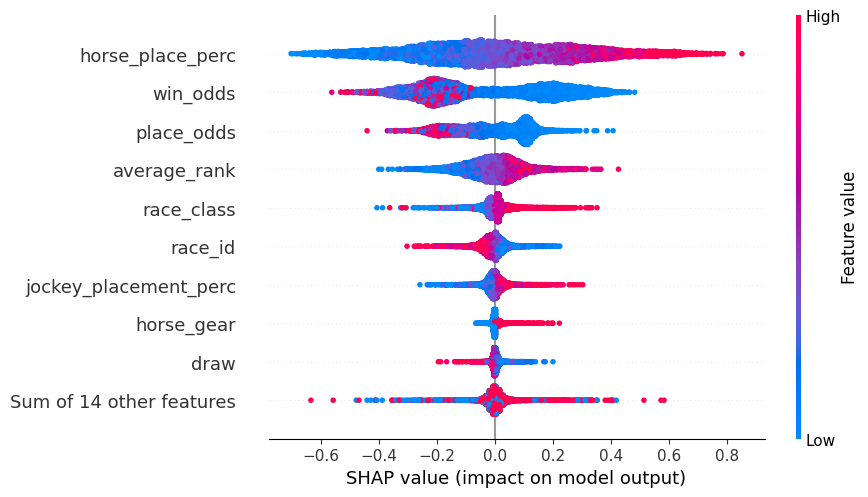

In [13]:
shap.plots.beeswarm(tabnet_shap_values)

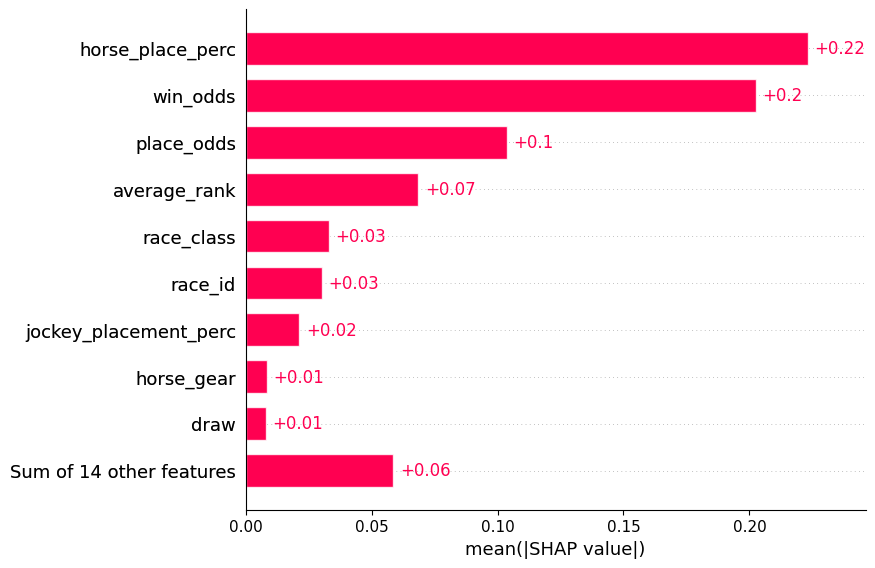

In [14]:
shap.plots.bar(tabnet_shap_values)